In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocessing
%matplotlib inline

In [3]:
data = pd.read_csv("C:\\Users\\DHRUBAJIT\\Desktop\\AnalyticsVidhya\\Adult income\\adult_data.txt",
                    names=[
                        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
                        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
                        "Hours per week", "Country", "Target"],
                        sep=r'\s*,\s*',  engine='python')
data

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
import seaborn as sns
def percentage_print(df,feature,kind):
    count = df[feature].value_counts()
    count = pd.DataFrame(count)
    count['Percentage'] = count.apply(lambda x: x/x.sum())
    print(count)
    plt.figure(figsize=[6,4])
    count['Percentage'].plot(kind = kind, color='b', alpha=0.6, rot=0)
    
    
def numerical_feat(df, feature):
    print(df[feature].describe())
    plt.figure(figsize=[12,4])
    plt.subplot(121)
    df[feature].hist()
    
    plt.subplot(122)
    sns.set_style("whitegrid")
    ax = sns.boxplot(x=df[feature])
    
def calc_prob(df, feat):
    group = pd.crosstab(df['Target'],df[feat])
    prob = group.apply(lambda x: x/x.sum())
    print(prob)
    plt.figure(figsize=[17,7])
    prob.plot(kind='bar', rot=0)
    plt.show()

    
def groupby_target(feat):
    group = data[['Target',feat]].groupby('Target').mean()
    group.plot(kind='bar', rot=0, alpha=0.5)
    plt.ylabel("Mean")

In [66]:
def hypothesis_ttest(feat):
    target_greater = data[data['Target'] == '>50K']
    target_less = data[data['Target'] == '<=50K']

    target_greater = target_greater[feat]
    target_less = target_less[feat]

    from scipy import stats
    t, p = stats.ttest_ind(target_greater,target_less)
    print("# '%s' Means #" %(feat))
    print("Target = >50k  : %.2f" %target_greater.mean())
    print("Target = <=50k : %.2f" %target_less.mean())
    print("---------------------------")
    print("t-test statistics...")
    print("t-stats = %f" %(t))
    print("p-value =  %f" %(p))
    print("---------------------------")

def chi2_test(feature):
    feature_target = pd.crosstab(data.Target, data[feature])
    print(feature_target)
    print("----------------------------------------------")
    print("Chi2 statistics for 'Target' and '%s'..." %(feature))
    from scipy import stats 
    chi2,p,df, arr = stats.chi2_contingency(feature_target, correction=False)
    print("Chi2 stat= %f" %(chi2))
    print("p-value  = %f" %(p))    
    print("----------------------------------------------")
    
def group_desc(feat):
    grp = data[['Target',feat]]
    target1 = grp[grp['Target'] == '>50K']
    target2 = grp[grp['Target'] == '<=50K']
    print("Target == >50K")
    print(target1.describe())
    print("--------------------------")
    print("Target == <=50K")
    print(target2.describe())
    print("--------------------------") 

### Data Analysis 

#### Response Variable

       Target  Percentage
<=50K   24720     0.75919
>50K     7841     0.24081


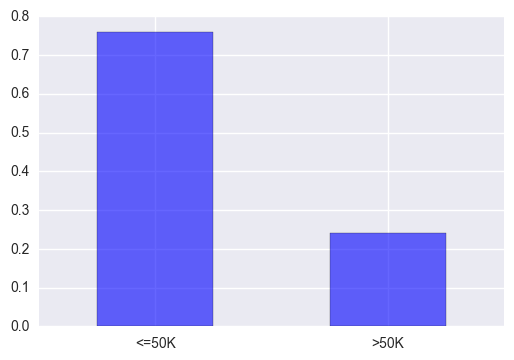

In [6]:
percentage_print(data,'Target','bar')

#### Predictors 

#### Workclass

                  Workclass  Percentage
Private               22696    0.697030
Self-emp-not-inc       2541    0.078038
Local-gov              2093    0.064279
?                      1836    0.056386
State-gov              1298    0.039864
Self-emp-inc           1116    0.034274
Federal-gov             960    0.029483
Without-pay              14    0.000430
Never-worked              7    0.000215


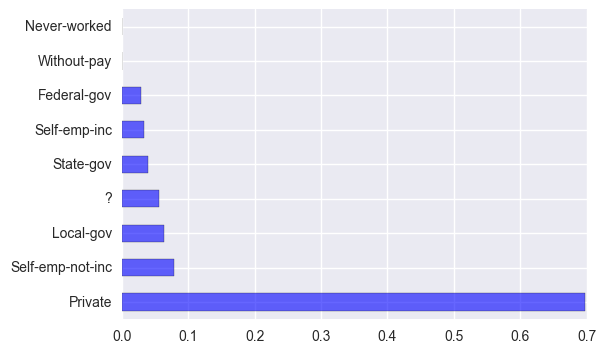

In [7]:
percentage_print(data,'Workclass', 'barh')

Workclass         ?  Federal-gov  Local-gov  Never-worked   Private  \
Target                                                                
<=50K      0.895969     0.613542   0.705208           1.0  0.781327   
>50K       0.104031     0.386458   0.294792           0.0  0.218673   

Workclass  Self-emp-inc  Self-emp-not-inc  State-gov  Without-pay  
Target                                                             
<=50K          0.442652          0.715073   0.728043          1.0  
>50K           0.557348          0.284927   0.271957          0.0  


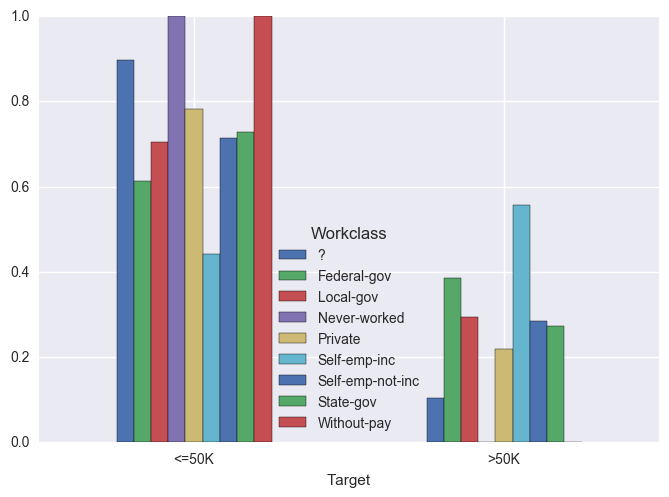

In [8]:
calc_prob(data, 'Workclass')

In [67]:
#combining 'without-pay', 'never-pay' and '?' together --> because they have no chance/very little change of getting >50K
data.loc[data['Workclass'] == 'Without-pay','Workclass'] = 'Others'
data.loc[data['Workclass'] == 'Never-worked','Workclass'] = 'Others'
data.loc[data['Workclass'] == '?','Workclass'] = 'Others'
    
chi2_test('Workclass')

Workclass  Federal-gov  Local-gov  Others  Private  Self-emp-inc  \
Target                                                             
<=50K              589       1476    1666    17733           494   
>50K               371        617     191     4963           622   

Workclass  Self-emp-not-inc  State-gov  
Target                                  
<=50K                  1817        945  
>50K                    724        353  
----------------------------------------------
Chi2 statistics for 'Target' and 'Workclass'...
Chi2 stat= 1044.479529
p-value  = 0.000000
----------------------------------------------


#### Education

              Education  Percentage
HS-grad           10501    0.322502
Some-college       7291    0.223918
Bachelors          5355    0.164461
Masters            1723    0.052916
Assoc-voc          1382    0.042443
11th               1175    0.036086
Assoc-acdm         1067    0.032769
10th                933    0.028654
7th-8th             646    0.019840
Prof-school         576    0.017690
9th                 514    0.015786
12th                433    0.013298
Doctorate           413    0.012684
5th-6th             333    0.010227
1st-4th             168    0.005160
Preschool            51    0.001566


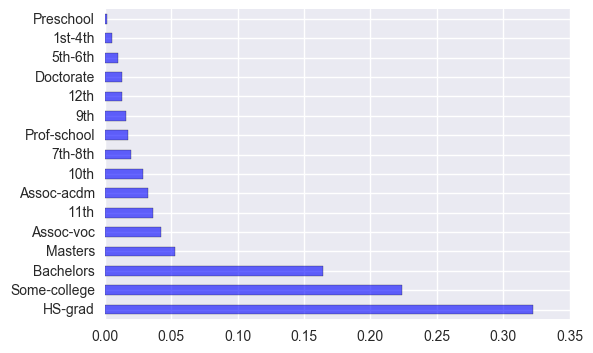

In [9]:
percentage_print(data,'Education', 'barh')

Education      10th      11th      12th   1st-4th   5th-6th  7th-8th  \
Target                                                                 
<=50K      0.933548  0.948936  0.923788  0.964286  0.951952  0.93808   
>50K       0.066452  0.051064  0.076212  0.035714  0.048048  0.06192   

Education       9th  Assoc-acdm  Assoc-voc  Bachelors  Doctorate   HS-grad  \
Target                                                                       
<=50K      0.947471     0.75164   0.738784   0.585247    0.25908  0.840491   
>50K       0.052529     0.24836   0.261216   0.414753    0.74092  0.159509   

Education   Masters  Preschool  Prof-school  Some-college  
Target                                                     
<=50K      0.443413        1.0     0.265625      0.809765  
>50K       0.556587        0.0     0.734375      0.190235  


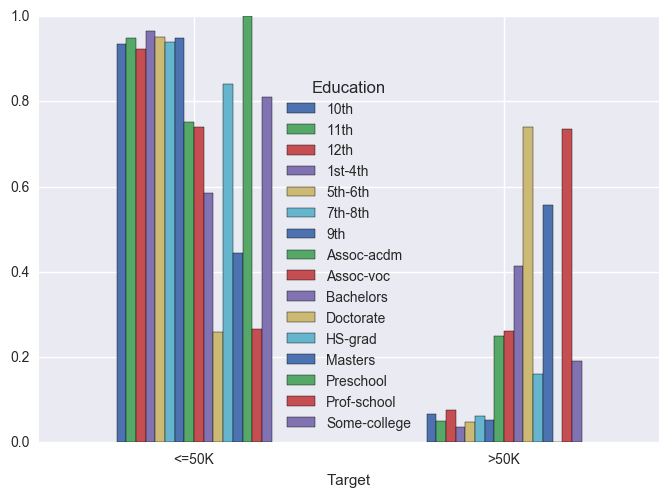

In [10]:
calc_prob(data, 'Education')

In [68]:
#combining these together --> because they have no chance/very little change of getting >50K
data.loc[data['Education'] == '10th','Education'] = 'Others'
data.loc[data['Education'] == '11th','Education'] = 'Others'
data.loc[data['Education'] == '12th','Education'] = 'Others'
data.loc[data['Education'] == '1st-4th','Education'] = 'Others'
data.loc[data['Education'] == '5th-6th','Education'] = 'Others'
data.loc[data['Education'] == '7th-8th','Education'] = 'Others'
data.loc[data['Education'] == '9th','Education'] = 'Others'
data.loc[data['Education'] == 'Preschool','Education'] = 'Others'

chi2_test('Education')

Education  Assoc-acdm  Assoc-voc  Bachelors  Doctorate  HS-grad  Masters  \
Target                                                                     
<=50K             802       1021       3134        107     8826      764   
>50K              265        361       2221        306     1675      959   

Education  Others  Prof-school  Some-college  
Target                                        
<=50K        4009          153          5904  
>50K          244          423          1387  
----------------------------------------------
Chi2 statistics for 'Target' and 'Education'...
Chi2 stat= 4426.489444
p-value  = 0.000000
----------------------------------------------


#### Marital Status

                       Martial Status  Percentage
Married-civ-spouse              14976    0.459937
Never-married                   10683    0.328092
Divorced                         4443    0.136452
Separated                        1025    0.031479
Widowed                           993    0.030497
Married-spouse-absent             418    0.012837
Married-AF-spouse                  23    0.000706


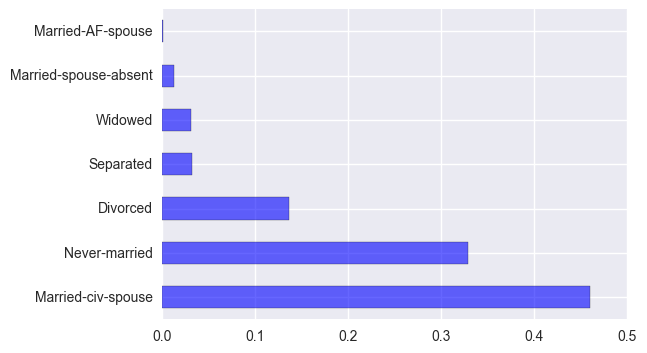

In [11]:
percentage_print(data,'Martial Status', 'barh')

Martial Status  Divorced  Married-AF-spouse  Married-civ-spouse  \
Target                                                            
<=50K           0.895791           0.565217            0.553152   
>50K            0.104209           0.434783            0.446848   

Martial Status  Married-spouse-absent  Never-married  Separated   Widowed  
Target                                                                     
<=50K                         0.91866       0.954039    0.93561  0.914401  
>50K                          0.08134       0.045961    0.06439  0.085599  


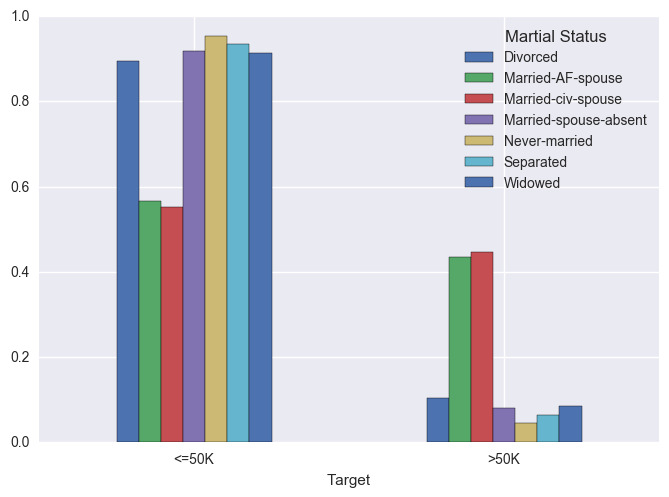

In [12]:
calc_prob(data, 'Martial Status')

In [69]:
#combining these together --> because they have no chance/very little chance of getting >50K
data.loc[data['Martial Status'] == 'Divorced','Martial Status'] = 'Others'
data.loc[data['Martial Status'] == 'Married-spouse-absent','Martial Status'] = 'Others'
data.loc[data['Martial Status'] == 'Never-married','Martial Status'] = 'Others'
data.loc[data['Martial Status'] == 'Separated','Martial Status'] = 'Others'
data.loc[data['Martial Status'] == 'Widowed','Martial Status'] = 'Others'

chi2_test('Martial Status')

Martial Status  Married-AF-spouse  Married-civ-spouse  Others
Target                                                       
<=50K                          13                8284   16423
>50K                           10                6692    1139
----------------------------------------------
Chi2 statistics for 'Target' and 'Martial Status'...
Chi2 stat= 6456.283398
p-value  = 0.000000
----------------------------------------------


#### Occupation

                   Occupation  Percentage
Prof-specialty           4140    0.127146
Craft-repair             4099    0.125887
Exec-managerial          4066    0.124873
Adm-clerical             3770    0.115783
Sales                    3650    0.112097
Other-service            3295    0.101195
Machine-op-inspct        2002    0.061485
?                        1843    0.056601
Transport-moving         1597    0.049046
Handlers-cleaners        1370    0.042075
Farming-fishing           994    0.030527
Tech-support              928    0.028500
Protective-serv           649    0.019932
Priv-house-serv           149    0.004576
Armed-Forces                9    0.000276


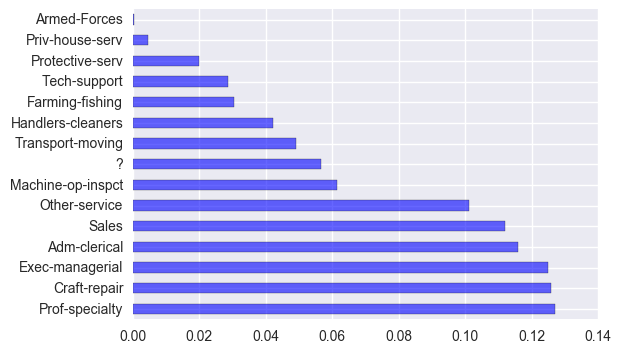

In [13]:
percentage_print(data,'Occupation', 'barh')

Occupation         ?  Adm-clerical  Armed-Forces  Craft-repair  \
Target                                                           
<=50K       0.896365      0.865517      0.888889      0.773359   
>50K        0.103635      0.134483      0.111111      0.226641   

Occupation  Exec-managerial  Farming-fishing  Handlers-cleaners  \
Target                                                            
<=50K              0.515986         0.884306           0.937226   
>50K               0.484014         0.115694           0.062774   

Occupation  Machine-op-inspct  Other-service  Priv-house-serv  Prof-specialty  \
Target                                                                          
<=50K                0.875125       0.958422         0.993289        0.550966   
>50K                 0.124875       0.041578         0.006711        0.449034   

Occupation  Protective-serv     Sales  Tech-support  Transport-moving  
Target                                                               

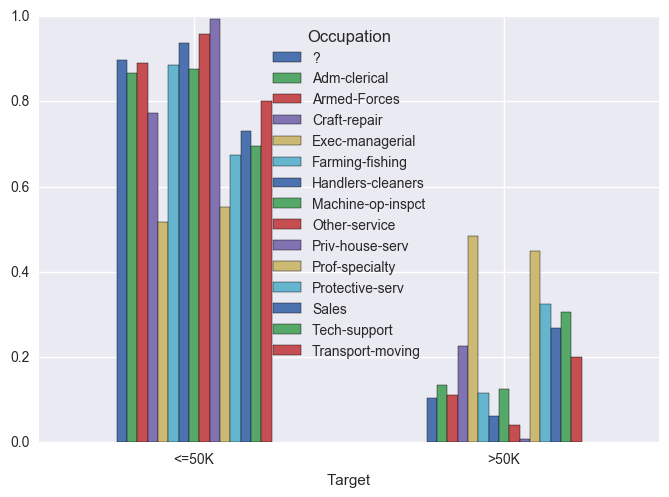

In [14]:
calc_prob(data, 'Occupation')

In [70]:
#combining these together --> because they have no chance/very little change of getting >50K
data.loc[data['Occupation'] == 'Farming-fishing','Occupation'] = 'Others'
data.loc[data['Occupation'] == 'Handlers-cleaners','Occupation'] = 'Others'
data.loc[data['Occupation'] == '?','Occupation'] = 'Others'
data.loc[data['Occupation'] == 'Adm-clerical','Occupation'] = 'Others'
data.loc[data['Occupation'] == 'Armed-Forces','Occupation'] = 'Others'
data.loc[data['Occupation'] == 'Machine-op-inspct','Occupation'] = 'Others'
data.loc[data['Occupation'] == 'Other-service','Occupation'] = 'Others'
data.loc[data['Occupation'] == 'Priv-house-serv','Occupation'] = 'Others'

chi2_test('Occupation')

Occupation  Craft-repair  Exec-managerial  Others  Prof-specialty  \
Target                                                              
<=50K               3170             2098   12144            2281   
>50K                 929             1968    1288            1859   

Occupation  Protective-serv  Sales  Tech-support  Transport-moving  
Target                                                              
<=50K                   438   2667           645              1277  
>50K                    211    983           283               320  
----------------------------------------------
Chi2 statistics for 'Target' and 'Occupation'...
Chi2 stat= 3921.448021
p-value  = 0.000000
----------------------------------------------


#### Relationship

                Relationship  Percentage
Husband                13193    0.405178
Not-in-family           8305    0.255060
Own-child               5068    0.155646
Unmarried               3446    0.105832
Wife                    1568    0.048156
Other-relative           981    0.030128


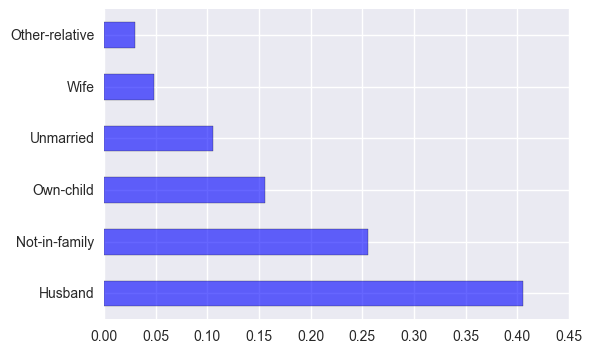

In [15]:
percentage_print(data,'Relationship', 'barh')

Relationship   Husband  Not-in-family  Other-relative  Own-child  Unmarried  \
Target                                                                        
<=50K         0.551429        0.89693        0.962283    0.98678   0.936738   
>50K          0.448571        0.10307        0.037717    0.01322   0.063262   

Relationship      Wife  
Target                  
<=50K         0.524872  
>50K          0.475128  


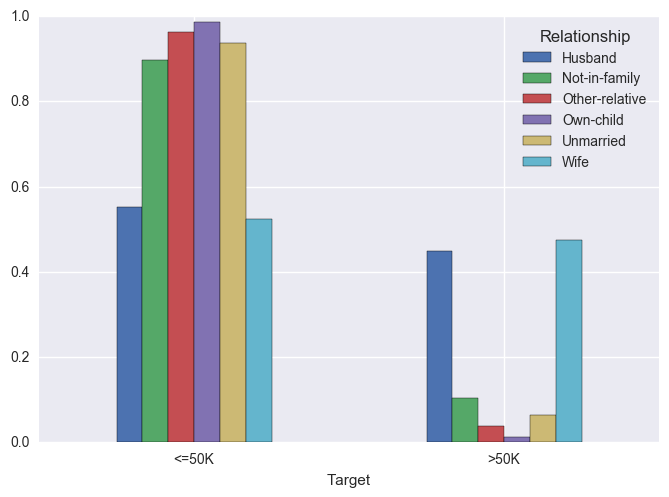

In [16]:
calc_prob(data, 'Relationship')

In [71]:
#combining these together --> because they have no chance/very little change of getting >50K
data.loc[data['Relationship'] == 'Not-in-family','Relationship'] = 'Others'
data.loc[data['Relationship'] == 'Other-relative','Relationship'] = 'Others'
data.loc[data['Relationship'] == 'Own-child','Relationship'] = 'Others'
data.loc[data['Relationship'] == 'Unmarried','Relationship'] = 'Others'

chi2_test('Relationship')

Relationship  Husband  Others  Wife
Target                             
<=50K            7275   16622   823
>50K             5918    1178   745
----------------------------------------------
Chi2 statistics for 'Target' and 'Relationship'...
Chi2 stat= 6554.996346
p-value  = 0.000000
----------------------------------------------


#### Race

                     Race  Percentage
White               27816    0.854274
Black                3124    0.095943
Asian-Pac-Islander   1039    0.031909
Amer-Indian-Eskimo    311    0.009551
Other                 271    0.008323


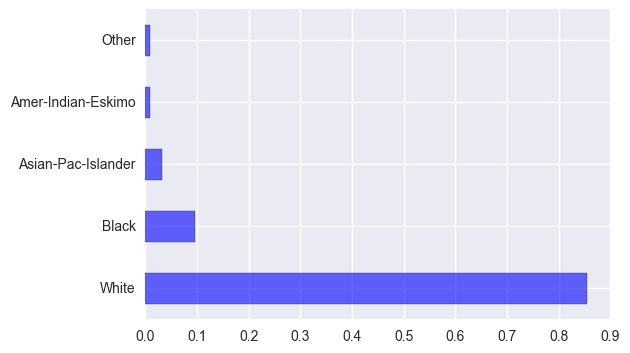

In [17]:
percentage_print(data,'Race', 'barh')

Race    Amer-Indian-Eskimo  Asian-Pac-Islander    Black     Other    White
Target                                                                    
<=50K             0.884244             0.73436  0.87612  0.907749  0.74414
>50K              0.115756             0.26564  0.12388  0.092251  0.25586


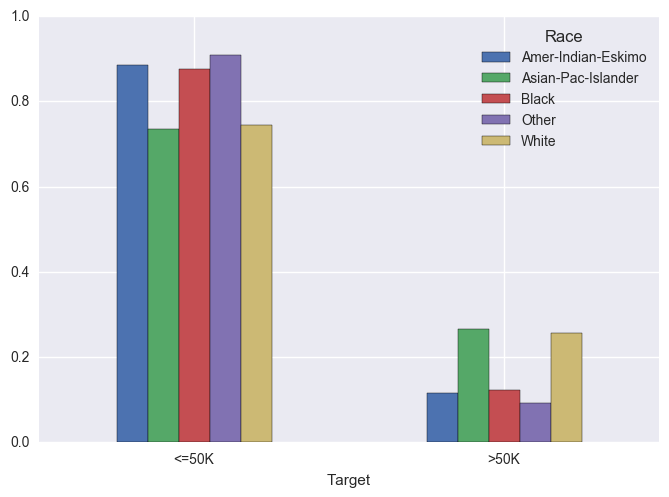

In [18]:
calc_prob(data, 'Race')

In [72]:
#combining these together --> because they have no chance/very little change of getting >50K
data.loc[data['Race'] == 'Amer-Indian-Eskimo','Race'] = 'Others'
data.loc[data['Race'] == 'Black','Race'] = 'Others'
data.loc[data['Race'] == 'Other','Race'] = 'Others'

chi2_test('Race')

Race    Asian-Pac-Islander  Others  White
Target                                   
<=50K                  763    3258  20699
>50K                   276     448   7117
----------------------------------------------
Chi2 statistics for 'Target' and 'Race'...
Chi2 stat= 329.507055
p-value  = 0.000000
----------------------------------------------


#### Sex

          Sex  Percentage
Male    21790    0.669205
Female  10771    0.330795


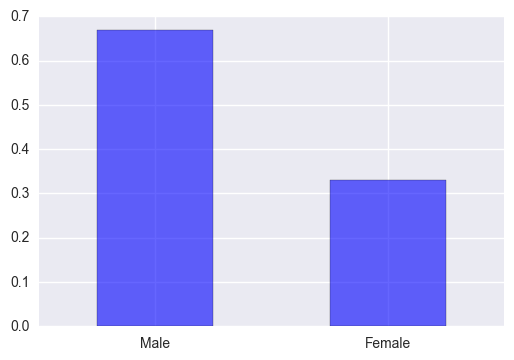

In [19]:
percentage_print(data,'Sex', 'bar')

Sex       Female      Male
Target                    
<=50K   0.890539  0.694263
>50K    0.109461  0.305737


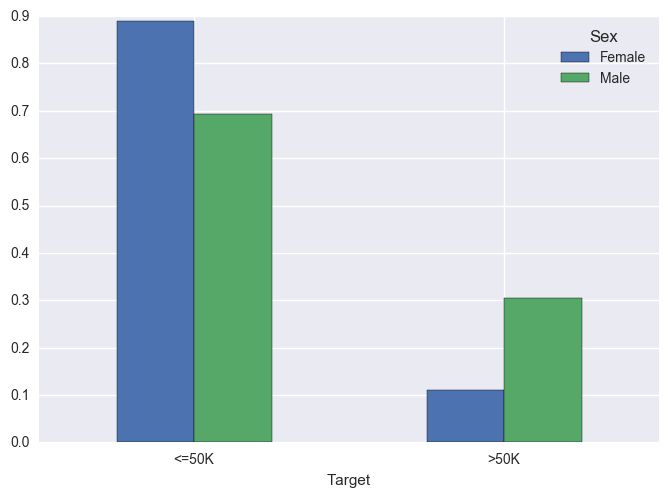

In [20]:
calc_prob(data, 'Sex')

In [73]:
chi2_test('Sex')

Sex     Female   Male
Target               
<=50K     9592  15128
>50K      1179   6662
----------------------------------------------
Chi2 statistics for 'Target' and 'Sex'...
Chi2 stat= 1518.886820
p-value  = 0.000000
----------------------------------------------


#### Country

In [21]:
data.loc[data['Country'] != 'United-States', 'Country'] = 'Others'

               Country  Percentage
United-States    29170    0.895857
Others            3391    0.104143


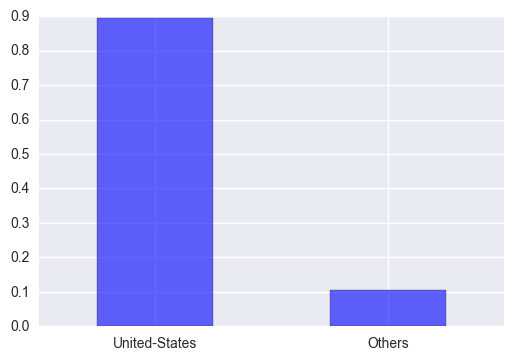

In [22]:
percentage_print(data,'Country', 'bar')

Country    Others  United-States
Target                          
<=50K    0.802418       0.754165
>50K     0.197582       0.245835


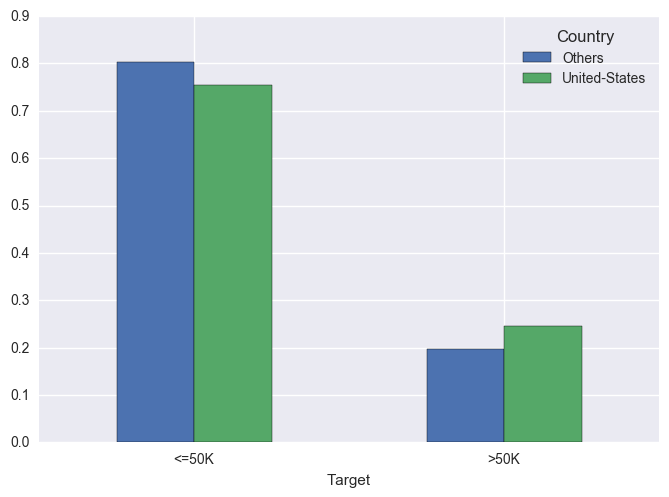

In [23]:
calc_prob(data, 'Country')

In [74]:
chi2_test('Country')

Country  Others  United-States
Target                        
<=50K      2721          21999
>50K        670           7171
----------------------------------------------
Chi2 statistics for 'Target' and 'Country'...
Chi2 stat= 38.689166
p-value  = 0.000000
----------------------------------------------


#### Age

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: Age, dtype: float64


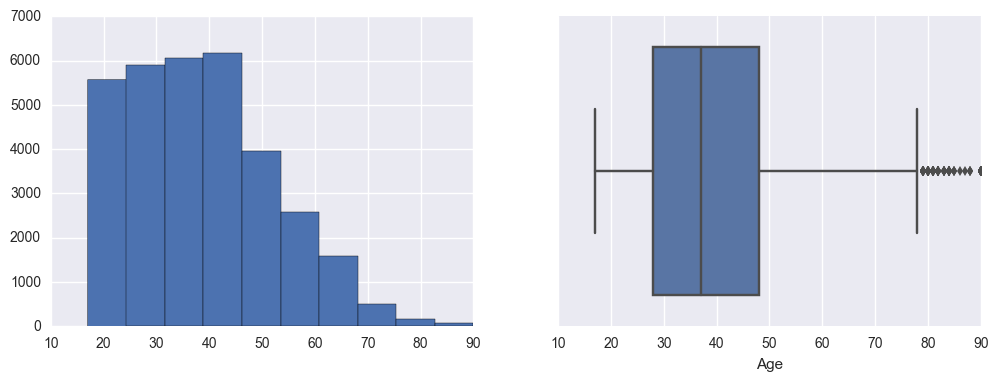

In [24]:
numerical_feat(data,'Age')

Target == >50K
               Age
count  7841.000000
mean     44.249841
std      10.519028
min      19.000000
25%      36.000000
50%      44.000000
75%      51.000000
max      90.000000
--------------------------
Target == <=50K
                Age
count  24720.000000
mean      36.783738
std       14.020088
min       17.000000
25%       25.000000
50%       34.000000
75%       46.000000
max       90.000000
--------------------------


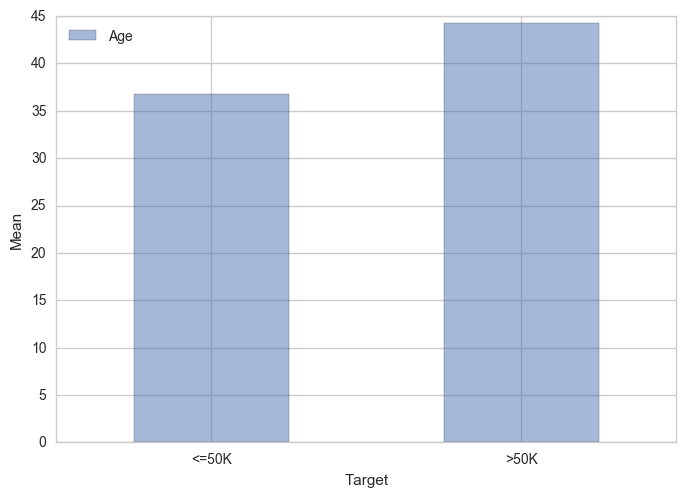

In [25]:
groupby_target('Age')
group_desc('Age')

In [59]:
hypothesis_ttest('Age')

# 'Age' Means #
Target = >50k  : 44.25
Target = <=50k : 36.78
---------------------------
t-test statistics...
t-stats = 43.436244
p-value =  0.000000
---------------------------


#### Capital Gain

count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: Capital Gain, dtype: float64


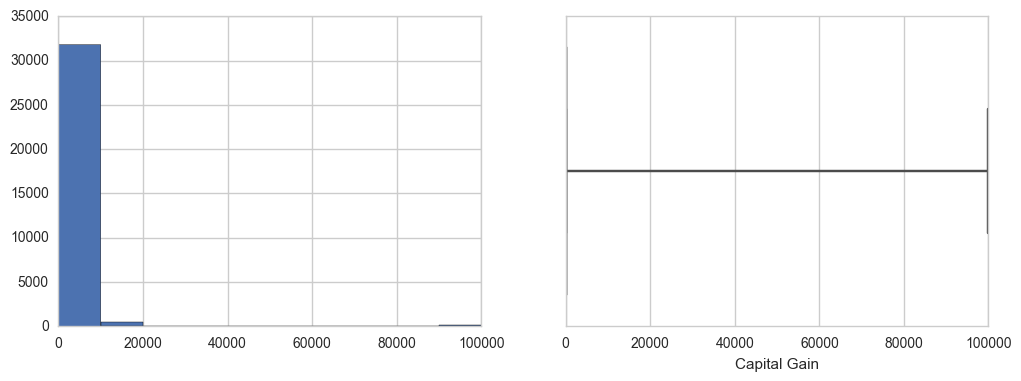

In [27]:
numerical_feat(data,'Capital Gain')

Target == >50K
       Capital Gain
count   7841.000000
mean    4006.142456
std    14570.378951
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max    99999.000000
--------------------------
Target == <=50K
       Capital Gain
count  24720.000000
mean     148.752468
std      963.139307
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max    41310.000000
--------------------------


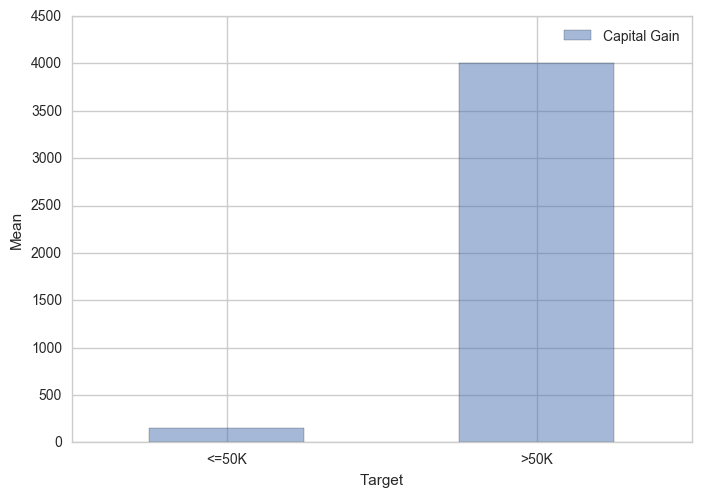

In [28]:
groupby_target('Capital Gain')
group_desc('Capital Gain')

In [60]:
hypothesis_ttest('Capital Gain')

# 'Capital Gain' Means #
Target = >50k  : 4006.14
Target = <=50k : 148.75
---------------------------
t-test statistics...
t-stats = 41.341868
p-value =  0.000000
---------------------------


#### Capital Loss

count    32561.000000
mean        87.303830
std        402.960219
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: Capital Loss, dtype: float64


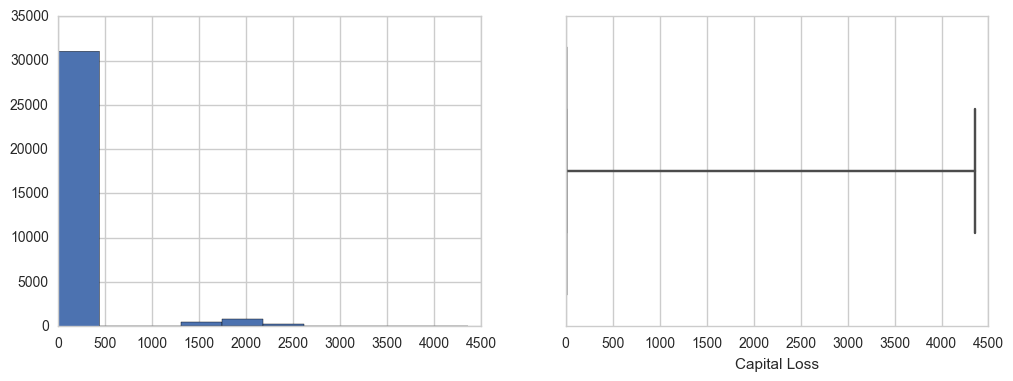

In [30]:
numerical_feat(data,'Capital Loss')

Target == >50K
       Capital Loss
count   7841.000000
mean     195.001530
std      595.487574
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max     3683.000000
--------------------------
Target == <=50K
       Capital Loss
count  24720.000000
mean      53.142921
std      310.755769
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max     4356.000000
--------------------------


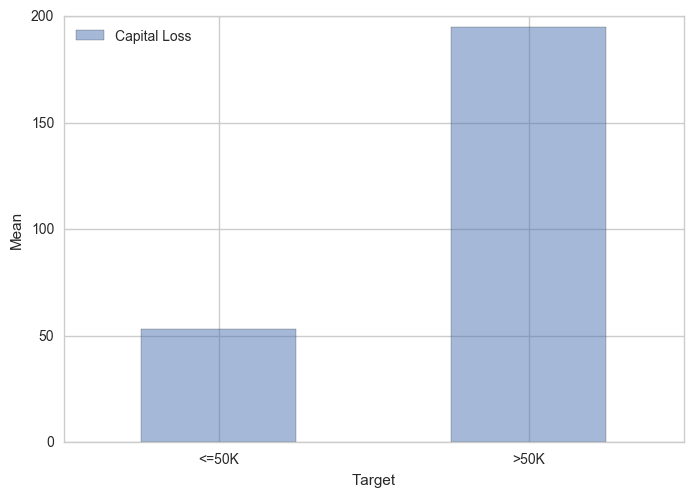

In [31]:
groupby_target('Capital Loss')
group_desc('Capital Loss')

In [61]:
hypothesis_ttest('Capital Loss')

# 'Capital Loss' Means #
Target = >50k  : 195.00
Target = <=50k : 53.14
---------------------------
t-test statistics...
t-stats = 27.474178
p-value =  0.000000
---------------------------


#### Hours per week

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: Hours per week, dtype: float64


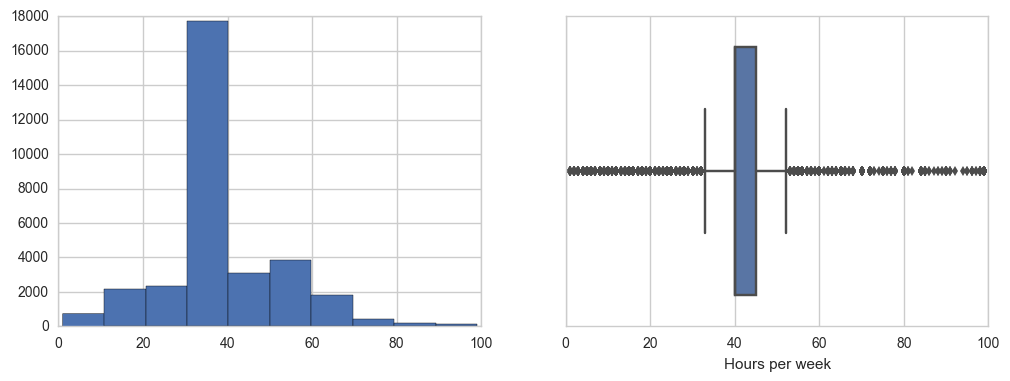

In [33]:
numerical_feat(data,'Hours per week')

Target == >50K
       Hours per week
count     7841.000000
mean        45.473026
std         11.012971
min          1.000000
25%         40.000000
50%         40.000000
75%         50.000000
max         99.000000
--------------------------
Target == <=50K
       Hours per week
count    24720.000000
mean        38.840210
std         12.318995
min          1.000000
25%         35.000000
50%         40.000000
75%         40.000000
max         99.000000
--------------------------


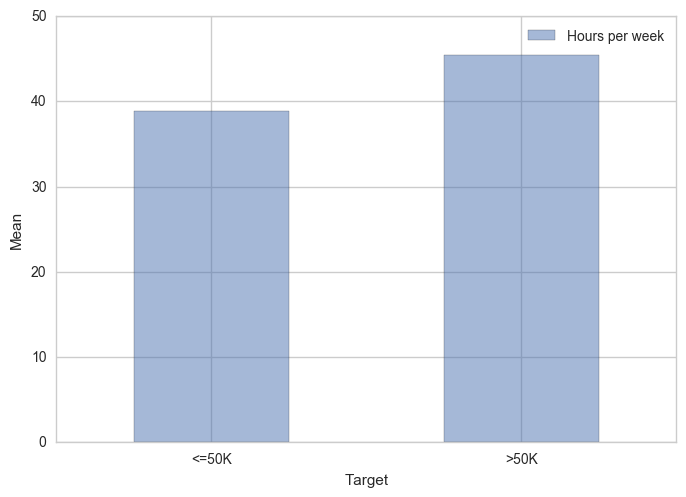

In [34]:
groupby_target('Hours per week')
group_desc('Hours per week')

In [62]:
hypothesis_ttest('Hours per week')

# 'Hours per week' Means #
Target = >50k  : 45.47
Target = <=50k : 38.84
---------------------------
t-test statistics...
t-stats = 42.583873
p-value =  0.000000
---------------------------


### Outliers Detection

count    32561.000000
mean         3.589360
std          0.360379
min          2.833213
25%          3.332205
50%          3.610918
75%          3.871201
max          4.499810
Name: Age, dtype: float64


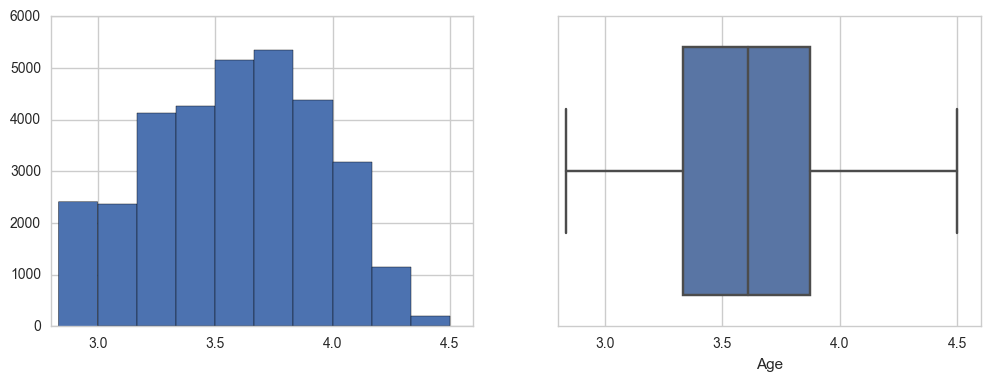

In [75]:
#1. Age

data['Age'] = np.log(data['Age'])
numerical_feat(data,'Age')

In [106]:
# Hours per week

mean = data['Hours per week'].mean()
std = data['Hours per week'].std()
ul = mean + (2*std)
ll = mean - (2*std)

def imputer(value):
    if value < ll:
        return ll
    elif value > ul:
        return ul
    else:
        return value

In [107]:
data['Hours per week'] = data['Hours per week'].apply(imputer)

count    32561.000000
mean        40.339218
std         10.813428
min         15.742598
25%         40.000000
50%         40.000000
75%         45.000000
max         65.132313
Name: Hours per week, dtype: float64


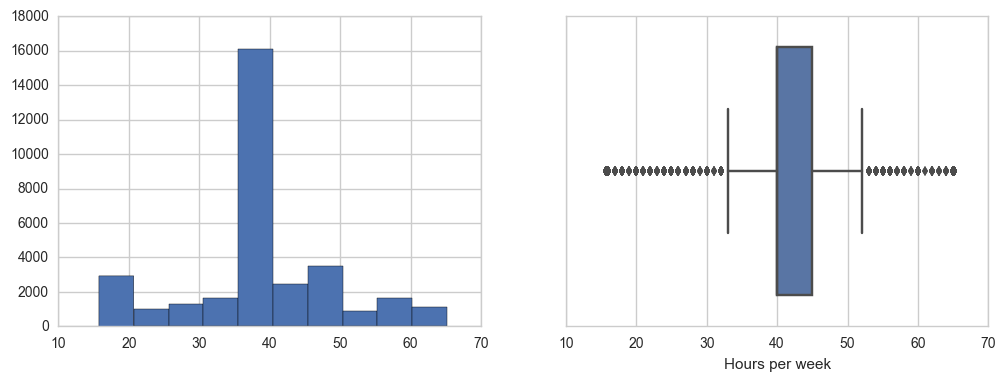

In [108]:
numerical_feat(data,'Hours per week')

In [112]:
data = data.to_csv("new_data.csv", index=False)